In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv("random_tree_data/train_data.csv")
test = pd.read_csv("random_tree_data/test_data.csv")

### Defining used columns and target classes

In [22]:
features = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar', 'bmi', 'healthy_weight']
classNames=["not smoking","smoking"]
Y_train = train["smoking"]
X_train = pd.get_dummies(train[features])
X_train

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,bmi,healthy_weight
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,18.5,1.0,0.9,35.0,53.0,61.0,1,1,25.95,1.0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,15.5,1.0,0.9,40.0,47.0,44.0,0,1,29.41,1.0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,13.6,1.0,0.9,33.0,57.0,36.0,0,1,26.67,1.0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,16.4,1.0,1.2,43.0,52.0,61.0,0,1,25.39,1.0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,14.5,1.0,0.8,15.0,16.0,31.0,0,1,24.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,15.0,1.0,0.8,33.0,43.0,46.0,0,0,25.95,1.0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,15.2,1.0,0.8,21.0,22.0,26.0,0,0,21.22,0.0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,14.2,1.0,0.6,24.0,23.0,25.0,1,1,22.22,0.0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,15.2,1.0,0.8,16.0,22.0,35.0,0,1,29.32,1.0


### Fitting our split data into the model
**We use random_state=1337 to have reproducible results**

In [23]:
model = RandomForestClassifier(random_state=1337,n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1337)

### Applying model on our test data

In [24]:
X_test = pd.get_dummies(test[features])
X_test.count()
features=X_train.columns

### Evaluation of accuracy on our test data

In [25]:
predictions = model.predict(X_test)
accuracy_score(test["smoking"], predictions)

0.8375976299488285

### Precision, recall, f1-score and support for our results

In [32]:
report = classification_report(test["smoking"], predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7060
           1       0.77      0.80      0.78      4079

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



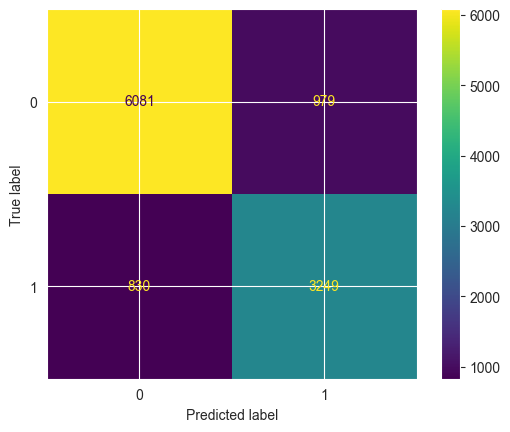

In [27]:
cm = confusion_matrix(test["smoking"], predictions)
ConfusionMatrixDisplay(cm).plot()

In [19]:
model = RandomForestClassifier(random_state=1337, n_estimators=10)
model.fit(X_train, Y_train)
X_test = pd.get_dummies(test[features])
X_test.count()
Features = X_train.columns
predictions = model.predict(X_test)
accuracy_score(test["smoking"], predictions)
report = classification_report(test["smoking"], predictions)
confmatrix=confusion_matrix(test["smoking"], predictions)
print(report)
print(confmatrix)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      7060
           1       0.77      0.70      0.73      4079

    accuracy                           0.81     11139
   macro avg       0.80      0.79      0.79     11139
weighted avg       0.81      0.81      0.81     11139

[[6198  862]
 [1236 2843]]
